In [4]:
import cv2
import matplotlib.pyplot as plt

In [25]:
import numpy as np

import random
 
def sp_noise(image, prob):

    """

    Add salt and pepper noise to an image.

    Parameters:

        image (numpy.ndarray): Input image array.

        prob (float): Probability of noise (between 0 and 1).

    Returns:

        numpy.ndarray: Image with salt and pepper noise added.

    """

    if not (0 <= prob <= 1):

        raise ValueError("Probability 'prob' must be between 0 and 1.")

    if not isinstance(image, np.ndarray):

        raise TypeError("Input 'image' must be a numpy array.")

    # Create a copy of the image to preserve the original

    output = np.copy(image)

    total_pixels = image.size
 
    # Calculate the number of salt and pepper pixels

    num_salt = int(total_pixels * prob)
    
    num_pepper = int(total_pixels * prob)
 
    # Randomly pick indices for salt and pepper

    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]

    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
 
    # Add salt (white pixels)

    output[tuple(salt_coords)] = 255
 
    # Add pepper (black pixels)

    output[tuple(pepper_coords)] = 0
 
    return output

 

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1c7307c2b50>)

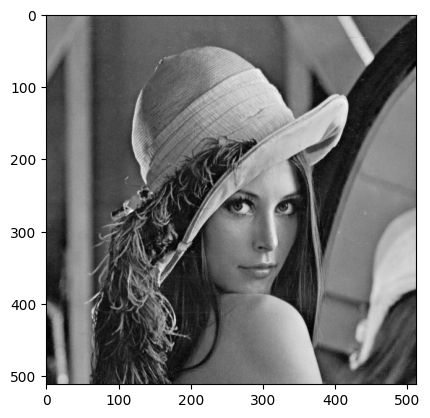

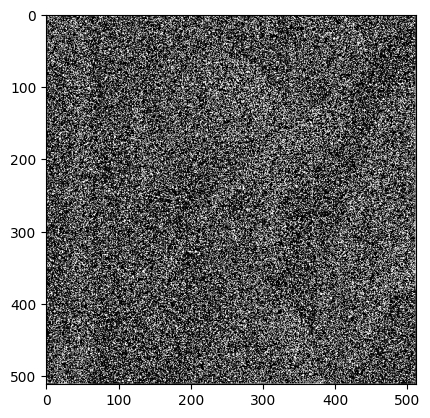

In [30]:
img = cv2.imread("Lena.png")
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.figure(), plt.imshow(img_gray, cmap='gray')

img_new = sp_noise(img_gray, 0.9)
plt.figure(), plt.imshow(img_new, cmap='gray')



(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1c7308c81d0>)

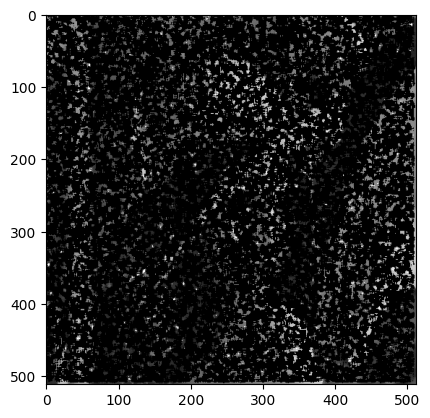

In [ ]:
img_new_without_noise = cv2.medianBlur(img_new, 5)
plt.figure(), plt.imshow(img_new_without_noise, cmap='gray')

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1c7309d4150>)

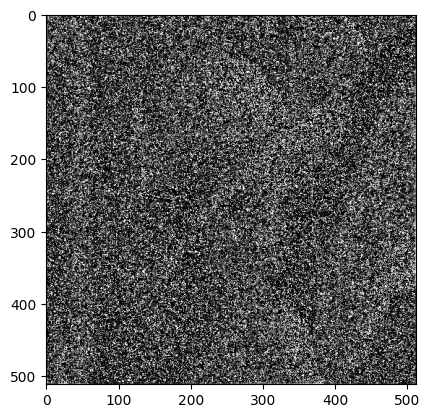

In [35]:
img_v2 = cv2.bilateralFilter(img_new,5,100,100)
plt.figure(), plt.imshow(img_v2, cmap='gray')

In [80]:
def filtru_salt_and_pepper(img, dim_fer):

    W,H = np.shape(img)
    img_copy = np.zeros((W,H))
    for i in range(dim_fer,W-dim_fer):
        for j in range(dim_fer,H-dim_fer):
            if img[i][j] == 0 or img[i][j] == 255:
                val = img[i-dim_fer//2:i+dim_fer//2][j-dim_fer//2:j+dim_fer//2].flatten()
                val = np.delete(val, np.where(val == 0))
                val = np.delete(val, np.where(val == 255))

                if len(val) == 0:
                    img_copy[i,j] = 125
                else:
                    img_copy[i,j] = np.mean(val)
            else:
                img_copy[i,j] = img[i,j]

    return img_copy          

In [76]:
img_zg = sp_noise(img_gray, 0.95)

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1c7333fc150>)

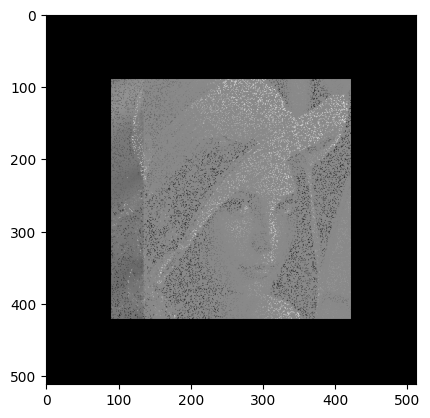

In [82]:
img_v3 = filtru_salt_and_pepper(img_zg, 90)
plt.figure(), plt.imshow(img_v3, cmap='gray')

In [50]:
tmp = [0,1,2,3,4,5]

tmp.remove(3)
print(tmp)

[0, 1, 2, 4, 5]
